<img align="right" src="images/tf-small.png" width="90"/>
<img align="right" src="images/etcbc.png" width="100"/>

# MiMi
## A Deterministic Coreference Resolver for Biblical Hebrew

MiMi is a deterministic -- meaning 'rule driven' -- coreference resolver for Biblical Hebrew. MiMi is the concatenation of Mi Mi in Biblical Hebrew, which means 'Who? Who?' MiMi is used as a tool to identify and analyse participants or entities in a text. MiMi has two phases: mention detection and coreference resolution. The aim was to build a near perfect mention detection phase and a modular coreference resolver that can be enhanced in future research. Most coreference resolvers, machine learning models or deterministic models, remove singletons in an additional third stage. We have chosen to retain singletons, since they are also of importance for participant analysis in Biblical Hebrew. MiMi, as demonstrated in this notebook, can be used for any Hebrew Bible book, regardless the genre. 

#### Phase One: Mention Detection
In the first phase the input text is tokenised and parsed for mentions. The API of [Text-Fabric](https://annotation.github.io/text-fabric/) is used to process the data of the BHSA [Hebrew Bible Database](https://etcbc.github.io/bhsa/) which contains the text of the Hebrew Bible augmented with linguistic annotations as compiled by the Eep Talstra Centre for Bible and Computer [ETCBC](http://etcbc.nl). The mention parser takes as input [phrase atoms](https://etcbc.github.io/bhsa/features/otype/), for which the ETCBC has already determined the boundaries. That makes the parsing of mentions much easier. For both the mention enrichment and the coreference resolution phase many BHSA features are used. The documentation can be found under the aforementioned phrase atom hyperlink. The mention parsing is done with a Python implemention of the lex and yac tools called [SLY](https://sly.readthedocs.io/en/latest/index.html). 

#### Phase Two: Coreference Resolution
In the second phase the mentions are stored as a coreference list of singleton sets. The coreference singleton sets are merged in a sequence of five sieves. MiMi resolves in order: predicates, pronouns, vocatives, appositions and fronted elements. MiMi resolves easy first, meaning that the most easy resolution choices are made first based on explicit information that is already available in the database. 
1. Predicates: MiMi's first sieve searches for explicit subject predicate relations. This is done with so-called mother - daughter clause and clause atom relations that the ETCBC has analysed. 
2. Pronouns: 1st and 2nd person mentions (verbs and pronouns) are resolved within the same paragraph, or domain. In the BHSA data one of the criteria for the determination of a domain is that the same subject is active. In that way it is possible to resolve 1st and 2nd person mentions relatively easy. 3rd person references are much harder and hence need more heuristic rules which are time consuming to program. 3rd person are therefore left out of consideration. 
3. Vocatives: vocative relations are characterised by 2nd person mentions. These are merged with the 2nd person predicate coreference classes. 
4. Appositions: apposition relations are code in the BHSA data. They are therefore easy to resolve.
5. Fronted elements: are also coded, but this data is most incomplete. The sieve is however added for two reasons. It does resolve some extra relations and the ETCBC aims at enriching this fronted element data in the near future. 

#### Statistics 
For both the mention detection phase and the coreference resolution phase statistics are generated per Hebrew Bible Book: 
* Mention detection statistics: give a view on what the success and failure of the mention parser is. The average success for the whole Hebrew Bible 99.5%. 
* Coreference resolution statistics: give a view on how many coreference singleton sets have been resolved. MiMi resolves about 29.6% sets on average. Important to note is that the unresolved sets contain both truly unresolved sets and singletons. The resolution percentage may thus in fact be higher. 
* Sieve statistics: give a view on how many singleton sets are resolved per sieve. 

#### Files
For each book a plain text `.out` file is generated in the same directory as in which the coreference command is given. The files are called `mention_errors_BIBLEBOOKNAME`. The `.out` file contains useful information about which phrase atoms could not be parsed by SLY's parser. The token is given, the text of the token, the start index of the word and word node. 

In [1]:
__author__ = 'erwich/sikkel'

In [2]:
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from mimi_hb import GoMiMi

Parser debugging for MyParser written to parser.out


In [4]:
mention_stats_df, coref_stats_df, sieve_stats_df = GoMiMi()


 Mention Detection Statistics Genesis: 
 15591 total phrase atoms parsed 
 15510 phrase atoms SUCCESFULLY parsed 
 81 phrase atoms FAILED to parse 
 99.5% parsing succes 
 0.5% parsing failure

 Coreference Resolution Statistics Genesis: 
 15554 total input corefs 
 4816 corefs RESOLVED 
 10738 corefs UNRESOLVED 
 31.0% corefs RESOLVED 
 69.0% corefs UNRESOLVED

 Sieve Statistics Genesis: 
 Resolve Predicate: 3246 
 Resolve Pronouns: 1174 
 Resolve Vocative: 66 
 Resolve Apposition: 300 
 Resolve Fronted Element: 30

 Mention Detection Statistics Exodus: 
 11715 total phrase atoms parsed 
 11622 phrase atoms SUCCESFULLY parsed 
 93 phrase atoms FAILED to parse 
 99.2% parsing succes 
 0.8% parsing failure

 Coreference Resolution Statistics Exodus: 
 11767 total input corefs 
 3077 corefs RESOLVED 
 8690 corefs UNRESOLVED 
 26.1% corefs RESOLVED 
 73.9% corefs UNRESOLVED

 Sieve Statistics Exodus: 
 Resolve Predicate: 2261 
 Resolve Pronouns: 674 
 Resolve Vocative: 13 
 Resolve Appos


 Mention Detection Statistics Amos: 
 1500 total phrase atoms parsed 
 1500 phrase atoms SUCCESFULLY parsed 
 0 phrase atoms FAILED to parse 
 100.0% parsing succes 
 0.0% parsing failure

 Coreference Resolution Statistics Amos: 
 1490 total input corefs 
 374 corefs RESOLVED 
 1116 corefs UNRESOLVED 
 25.1% corefs RESOLVED 
 74.9% corefs UNRESOLVED

 Sieve Statistics Amos: 
 Resolve Predicate: 270 
 Resolve Pronouns: 77 
 Resolve Vocative: 10 
 Resolve Apposition: 15 
 Resolve Fronted Element: 2

 Mention Detection Statistics Obadiah: 
 229 total phrase atoms parsed 
 229 phrase atoms SUCCESFULLY parsed 
 0 phrase atoms FAILED to parse 
 100.0% parsing succes 
 0.0% parsing failure

 Coreference Resolution Statistics Obadiah: 
 228 total input corefs 
 68 corefs RESOLVED 
 160 corefs UNRESOLVED 
 29.8% corefs RESOLVED 
 70.2% corefs UNRESOLVED

 Sieve Statistics Obadiah: 
 Resolve Predicate: 42 
 Resolve Pronouns: 25 
 Resolve Vocative: 1 
 Resolve Apposition: 0 
 Resolve Fronted El


 Coreference Resolution Statistics Lamentations: 
 1405 total input corefs 
 499 corefs RESOLVED 
 906 corefs UNRESOLVED 
 35.5% corefs RESOLVED 
 64.5% corefs UNRESOLVED

 Sieve Statistics Lamentations: 
 Resolve Predicate: 299 
 Resolve Pronouns: 176 
 Resolve Vocative: 19 
 Resolve Apposition: 3 
 Resolve Fronted Element: 2

 Mention Detection Statistics Esther: 
 2064 total phrase atoms parsed 
 2057 phrase atoms SUCCESFULLY parsed 
 7 phrase atoms FAILED to parse 
 99.7% parsing succes 
 0.3% parsing failure

 Coreference Resolution Statistics Esther: 
 2052 total input corefs 
 468 corefs RESOLVED 
 1584 corefs UNRESOLVED 
 22.8% corefs RESOLVED 
 77.2% corefs UNRESOLVED

 Sieve Statistics Esther: 
 Resolve Predicate: 359 
 Resolve Pronouns: 29 
 Resolve Vocative: 4 
 Resolve Apposition: 75 
 Resolve Fronted Element: 1

 Mention Detection Statistics Daniel: 
 1781 total phrase atoms parsed 
 1768 phrase atoms SUCCESFULLY parsed 
 13 phrase atoms FAILED to parse 
 99.3% parsing s

In [5]:
# average mention detection success HB
avg_mention_success = round((1 - (mention_stats_df['failure'].sum() / mention_stats_df['success'].sum())) * 100, 1)

# average mention detection failure HB
avg_mention_failure = round((mention_stats_df['failure'].sum() / mention_stats_df['success'].sum()) * 100, 1)

print('Mention detection for the Hebrew Bible: \n',\
    f'{avg_mention_success}% average success \n',\
    f'{avg_mention_failure}% average failure')

Mention detection for the Hebrew Bible: 
 99.5% average success 
 0.5% average failure


In [6]:
# average coreference resolution success HB
avg_coreference_resolved = round(((1- coref_stats_df['unresolved'].sum() / coref_stats_df['input corefs'].sum())) * 100, 1)

# average coreference resolution success HB
avg_coreference_unresolved = round((coref_stats_df['unresolved'].sum() / coref_stats_df['input corefs'].sum()) * 100, 1)

print('Coreference Resolution for the Hebrew Bible: \n',\
    f'{avg_coreference_resolved}% average resolved \n',\
    f'{avg_coreference_unresolved}% average unresolved')

Coreference Resolution for the Hebrew Bible: 
 29.6% average resolved 
 70.4% average unresolved


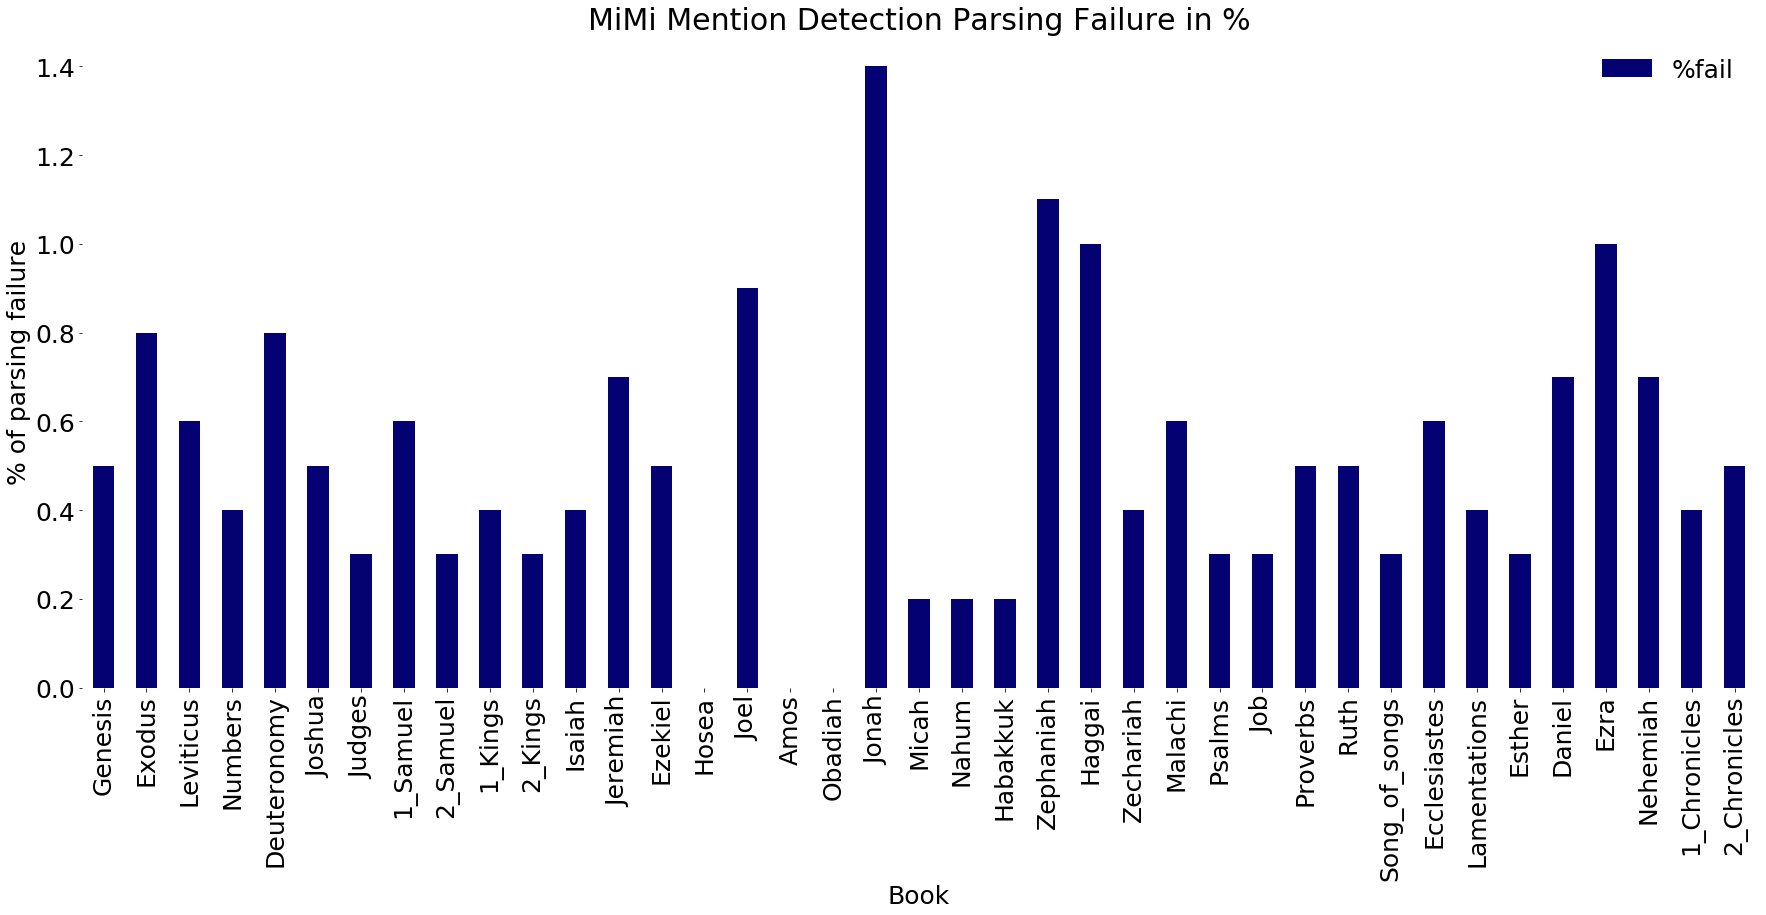

In [7]:
def PlotMentionDf(mention_stats_df):

    mention_stats_df.plot(x='book', y='%fail', kind='bar', color='xkcd:deep blue', 
                  figsize=(30,12),
                  fontsize=25, 
                 )

    plt.title(('MiMi Mention Detection Parsing Failure in %'), fontsize=30)
    plt.xlabel('Book', fontsize=25)
    plt.ylabel('% of parsing failure', fontsize=25)
    plt.box(False)
    plt.legend(frameon=False, fontsize=25)
    plt.show()
    
PlotMentionDf(mention_stats_df)

In [11]:
mention_stats_df

,book,phrase atoms,success,failure,%success,%fail
0,Genesis,15591,15510,81,99.5,0.5
1,Exodus,11715,11622,93,99.2,0.8
2,Leviticus,8485,8431,54,99.4,0.6
3,Numbers,11048,11004,44,99.6,0.4
4,Deuteronomy,11102,11010,92,99.2,0.8
5,Joshua,6549,6519,30,99.5,0.5
6,Judges,7201,7179,22,99.7,0.3
7,1_Samuel,10003,9943,60,99.4,0.6
8,2_Samuel,8189,8167,22,99.7,0.3
9,1_Kings,9503,9463,40,99.6,0.4


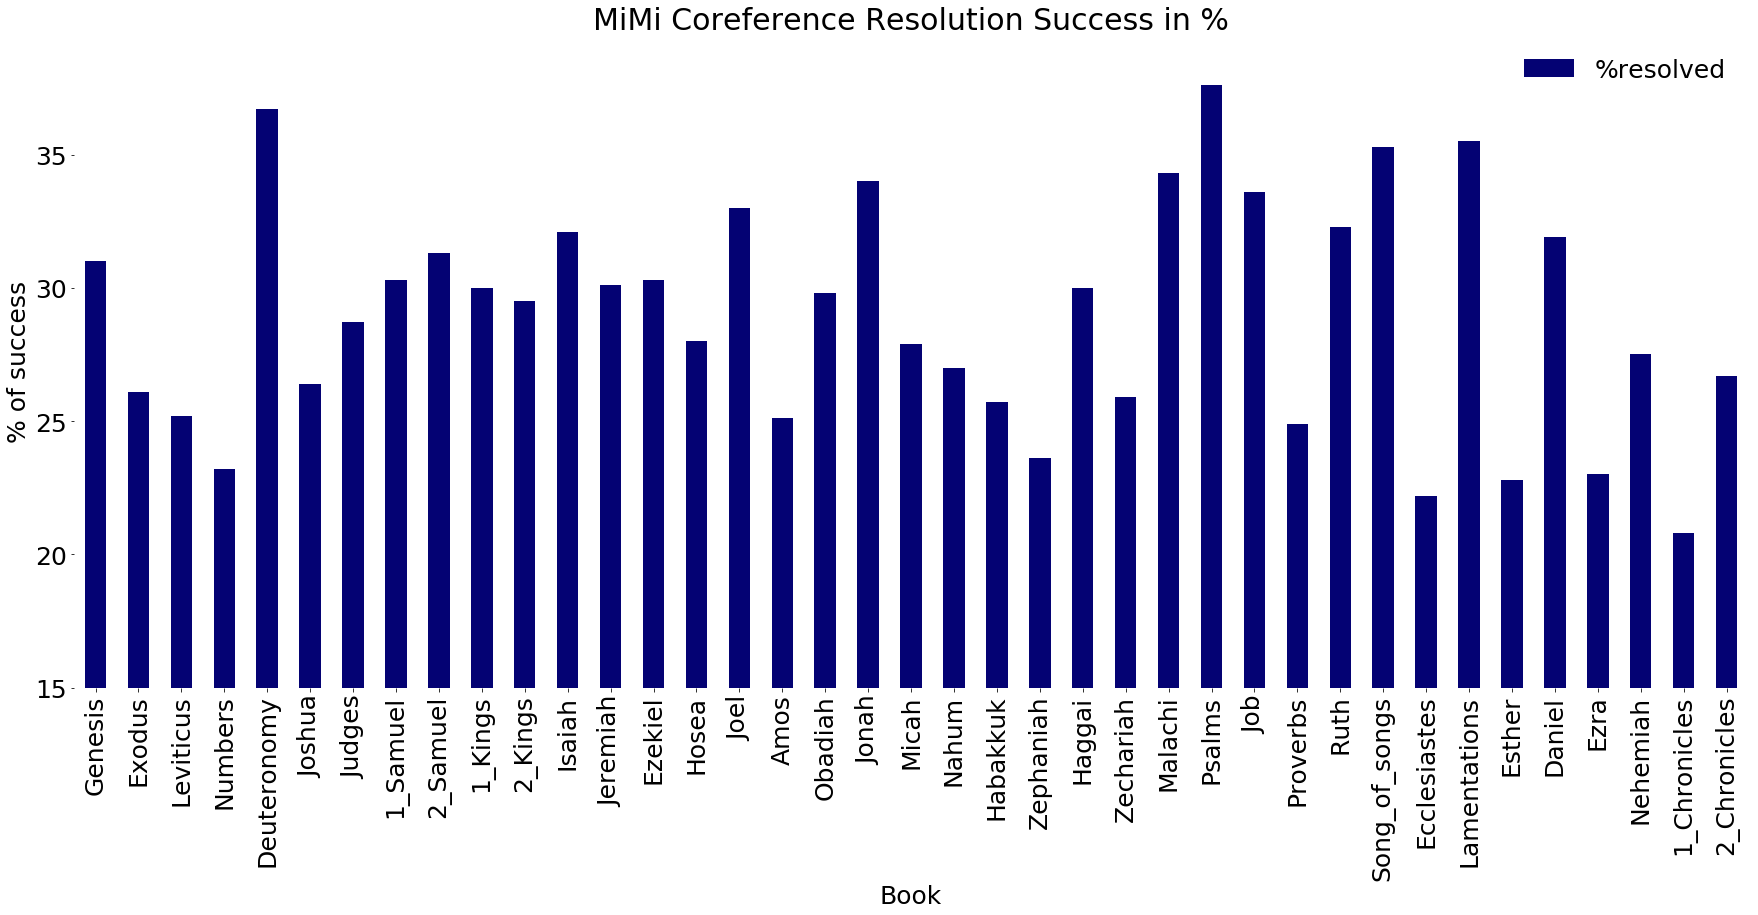

In [8]:
def PlotCoreferenceDf(coref_stats_df):

    coref_stats_df.plot(x='book', y='%resolved', kind='bar', color='xkcd:deep blue', 
                  figsize=(30,12),
                  fontsize=25, 
                 )

    plt.title(('MiMi Coreference Resolution Success in %'), fontsize=30)
    plt.xlabel('Book', fontsize=25)
    plt.ylabel('% of success', fontsize=25)
    plt.box(False)
    plt.legend(frameon=False, fontsize=25)
    plt.ylim(ymin=15)
    plt.show()
    
PlotCoreferenceDf(coref_stats_df)

In [10]:
coref_stats_df

,book,input corefs,resolved,unresolved,%resolved,%unresolved
0,Genesis,15554,4816,10738,31.0,69.0
1,Exodus,11767,3077,8690,26.1,73.9
2,Leviticus,8601,2167,6434,25.2,74.8
3,Numbers,11102,2571,8531,23.2,76.8
4,Deuteronomy,11088,4068,7020,36.7,63.3
5,Joshua,6652,1757,4895,26.4,73.6
6,Judges,7228,2073,5155,28.7,71.3
7,1_Samuel,9950,3014,6936,30.3,69.7
8,2_Samuel,8196,2565,5631,31.3,68.7
9,1_Kings,9529,2856,6673,30.0,70.0


In [9]:
sieve_stats_df

,book,resolve predicate,resolve pronouns,resolve vocative,resolve apposition,resolve fronted element
0,Genesis,3246,1174,66,300,30
1,Exodus,2261,674,13,116,13
2,Leviticus,1541,537,0,63,26
3,Numbers,1845,447,19,243,17
4,Deuteronomy,1945,1757,18,336,12
5,Joshua,1212,340,6,188,11
6,Judges,1651,272,22,124,4
7,1_Samuel,2225,597,35,155,2
8,2_Samuel,1726,490,58,286,5
9,1_Kings,1907,507,48,373,21
